In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/tkh5044/portfolio/master/capstone-predicting-game-attendance/data/all-teams-1990-2016.csv')
df.head()

,date,team_x,opponent,div_rank,gb,time,attendance,streak,double_header,runs_pg,...,year,month,day,weekday,weekday_name,stadium,capacity,bat_age,pitch_age,division_game
0,1997-04-02,ANA,BOS,0,0.0,0 days 03:47:00.000000000,30874,0,0,0.000000,...,1997,4,2,2,Wednesday,Angel Stadium,33851,29.7,28.3,0
1,1997-04-03,ANA,BOS,3,-1.0,0 days 02:07:00.000000000,17323,-1,0,5.000000,...,1997,4,3,3,Thursday,Angel Stadium,33851,29.7,28.3,0
2,1997-08-22,ANA,BOS,2,-2.5,0 days 03:25:00.000000000,24977,-3,0,5.273438,...,1997,8,22,4,Friday,Angel Stadium,33851,29.7,28.3,0
3,1997-08-23,ANA,BOS,2,-2.5,0 days 02:49:00.000000000,20994,1,0,5.294574,...,1997,8,23,5,Saturday,Angel Stadium,33851,29.7,28.3,0
4,1997-08-24,ANA,BOS,2,-1.5,0 days 02:36:00.000000000,20733,2,0,5.300000,...,1997,8,24,6,Sunday,Angel Stadium,33851,29.7,28.3,0


In [3]:
# drop years before 2010 -> one year of data
df['date'] = pd.to_datetime(df['date'])
df = df[df.date > '2000-01-01']
df.head()

,date,team_x,opponent,div_rank,gb,time,attendance,streak,double_header,runs_pg,...,year,month,day,weekday,weekday_name,stadium,capacity,bat_age,pitch_age,division_game
3923,2000-04-03,ANA,NYY,0,0.0,0 days 03:02:00.000000000,42704,0,0,0.000000,...,2000,4,3,0,Monday,Angel Stadium,45050,27.7,28.9,0
3924,2000-04-04,ANA,NYY,3,-1.0,0 days 03:20:00.000000000,25818,-1,0,2.000000,...,2000,4,4,1,Tuesday,Angel Stadium,45050,27.7,28.9,0
3925,2000-04-05,ANA,NYY,4,-2.0,0 days 03:01:00.000000000,24560,-2,0,2.500000,...,2000,4,5,2,Wednesday,Angel Stadium,45050,27.7,28.9,0
3926,2000-08-11,ANA,NYY,3,-8.5,0 days 03:01:00.000000000,43169,-1,0,5.269565,...,2000,8,11,4,Friday,Angel Stadium,45050,27.7,28.9,0
3927,2000-08-12,ANA,NYY,3,-9.0,0 days 03:18:00.000000000,43394,1,0,5.293103,...,2000,8,12,5,Saturday,Angel Stadium,45050,27.7,28.9,0


In [4]:
df = df.sort_values(by=['date'])
df.head()

,date,team_x,opponent,div_rank,gb,time,attendance,streak,double_header,runs_pg,...,year,month,day,weekday,weekday_name,stadium,capacity,bat_age,pitch_age,division_game
13379,2000-03-29,NYM,CHC,0,0.0,0 days 03:26:00.000000000,55000,0,0,0.0,...,2000,3,29,2,Wednesday,Shea Stadium,55777,30.4,31.0,0
13180,2000-03-30,CHC,NYM,1,0.5,0 days 03:55:00.000000000,55000,1,0,5.0,...,2000,3,30,3,Thursday,Wrigley Field,38884,30.8,28.4,0
3923,2000-04-03,ANA,NYY,0,0.0,0 days 03:02:00.000000000,42704,0,0,0.0,...,2000,4,3,0,Monday,Angel Stadium,45050,27.7,28.9,0
12653,2000-04-03,NYM,SDP,1,0.0,0 days 02:24:00.000000000,52308,1,0,4.0,...,2000,4,3,0,Monday,Shea Stadium,55777,30.4,31.0,0
12703,2000-04-03,CIN,MIL,0,0.0,0 days 01:51:00.000000000,55596,0,0,0.0,...,2000,4,3,0,Monday,Riverfront Stadium,52952,29.2,28.5,1


In [5]:
df.shape

(41109, 27)

(array([ 265., 2732., 5108., 6804., 6752., 7518., 7760., 3151.,  935.,
          84.]),
 array([ 2134. ,  8091.3, 14048.6, 20005.9, 25963.2, 31920.5, 37877.8,
        43835.1, 49792.4, 55749.7, 61707. ]),
 <BarContainer object of 10 artists>)

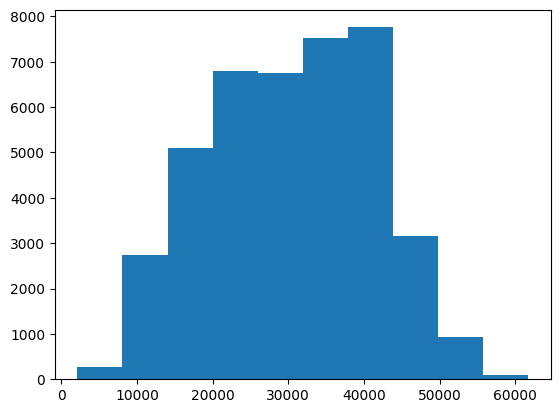

In [6]:
plt.hist([df["attendance"]])

<Axes: xlabel='date'>

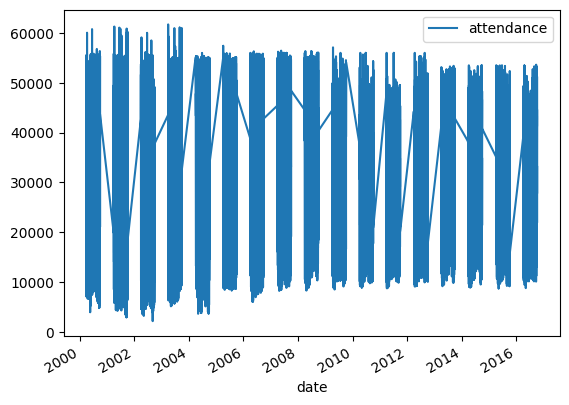

In [7]:
pd.DataFrame(df,columns=['date','attendance']).plot(x ='date', y='attendance', kind = 'line')

In [8]:
df.describe()


,div_rank,gb,attendance,streak,double_header,runs_pg,runs_ma,runs_allowed_ma,ten_game,opening_day,...,win_pct,night_game,year,month,day,weekday,capacity,bat_age,pitch_age,division_game
count,41109.000000,41109.000000,41109.000000,41109.000000,41109.000000,41109.000000,41109.000000,41109.000000,41109.000000,41109.000000,...,41109.000000,41109.000000,41109.000000,41109.000000,41109.000000,41109.000000,41109.000000,41109.000000,41109.000000,41109.000000
mean,2.938335,-6.500049,30468.088594,0.129680,0.015885,4.539531,4.540524,4.547729,0.457213,0.012406,...,0.497341,0.676397,2008.006908,6.567759,15.848914,3.202778,44594.718140,28.891761,28.614488,0.447664
std,1.473293,8.705611,10833.188068,2.556759,0.125031,0.834233,1.556335,1.503137,0.180015,0.110691,...,0.112226,0.467856,4.898657,1.722167,8.865041,1.969467,6006.869256,1.338075,1.411101,0.497259
min,0.000000,-49.000000,2134.000000,-15.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,...,0.000000,0.000000,2000.000000,3.000000,1.000000,0.000000,31042.000000,25.600000,25.300000,0.000000
25%,2.000000,-11.000000,21820.000000,-1.000000,0.000000,4.111111,3.400000,3.400000,0.300000,0.000000,...,0.440000,0.000000,2004.000000,5.000000,8.000000,1.000000,40950.000000,27.900000,27.700000,0.000000
50%,3.000000,-5.000000,30952.000000,1.000000,0.000000,4.526316,4.400000,4.400000,0.500000,0.000000,...,0.500000,1.000000,2008.000000,7.000000,16.000000,3.000000,43545.000000,28.800000,28.400000,0.000000
75%,4.000000,-1.000000,39123.000000,2.000000,0.000000,4.961538,5.600000,5.400000,0.600000,0.000000,...,0.559055,1.000000,2012.000000,8.000000,24.000000,5.000000,48678.000000,29.800000,29.300000,1.000000
max,6.000000,22.000000,61707.000000,19.000000,1.000000,16.000000,16.000000,12.800000,1.000000,1.000000,...,1.000000,1.000000,2016.000000,10.000000,31.000000,6.000000,66307.000000,33.600000,34.200000,1.000000


In [9]:
df.columns

Index(['date', 'team_x', 'opponent', 'div_rank', 'gb', 'time', 'attendance',
       'streak', 'double_header', 'runs_pg', 'runs_ma', 'runs_allowed_ma',
       'ten_game', 'opening_day', 'total_games', 'win_pct', 'night_game',
       'year', 'month', 'day', 'weekday', 'weekday_name', 'stadium',
       'capacity', 'bat_age', 'pitch_age', 'division_game'],
      dtype='object')

In [10]:
#bat_age -> average age of batter, pitch_age -> average age of pitcher, dont really help that much

In [11]:
df.dtypes

date               datetime64[ns]
team_x                     object
opponent                   object
div_rank                    int64
gb                        float64
time                       object
attendance                  int64
streak                      int64
double_header               int64
runs_pg                   float64
runs_ma                   float64
runs_allowed_ma           float64
ten_game                  float64
opening_day                 int64
total_games                 int64
win_pct                   float64
night_game                  int64
year                        int64
month                       int64
day                         int64
weekday                     int64
weekday_name               object
stadium                    object
capacity                    int64
bat_age                   float64
pitch_age                 float64
division_game               int64
dtype: object

In [12]:
'''
sns.pairplot(
    df_OAK,
    x_vars=list(df_OAK.columns.values),
    y_vars=["attendance"],
)
'''

'\nsns.pairplot(\n    df_OAK,\n    x_vars=list(df_OAK.columns.values),\n    y_vars=["attendance"],\n)\n'

In [13]:
df['new_series'] = [1] * len(df['attendance'])

In [14]:
df = df.reset_index()

In [15]:
lastRow = df.iloc[0]
for index, row in df.iterrows():
    if row['opponent'] == lastRow['opponent'] and index > 0:
        df.at[index,'new_series'] = 0
    lastRow = row
df.head()

,index,date,team_x,opponent,div_rank,gb,time,attendance,streak,double_header,...,month,day,weekday,weekday_name,stadium,capacity,bat_age,pitch_age,division_game,new_series
0,13379,2000-03-29,NYM,CHC,0,0.0,0 days 03:26:00.000000000,55000,0,0,...,3,29,2,Wednesday,Shea Stadium,55777,30.4,31.0,0,1
1,13180,2000-03-30,CHC,NYM,1,0.5,0 days 03:55:00.000000000,55000,1,0,...,3,30,3,Thursday,Wrigley Field,38884,30.8,28.4,0,1
2,3923,2000-04-03,ANA,NYY,0,0.0,0 days 03:02:00.000000000,42704,0,0,...,4,3,0,Monday,Angel Stadium,45050,27.7,28.9,0,1
3,12653,2000-04-03,NYM,SDP,1,0.0,0 days 02:24:00.000000000,52308,1,0,...,4,3,0,Monday,Shea Stadium,55777,30.4,31.0,0,1
4,12703,2000-04-03,CIN,MIL,0,0.0,0 days 01:51:00.000000000,55596,0,0,...,4,3,0,Monday,Riverfront Stadium,52952,29.2,28.5,1,1


In [16]:
columns = list(df.columns.values)
columns.remove('time')
columns.remove('pitch_age')
columns.remove('bat_age')
columns

['index',
 'date',
 'team_x',
 'opponent',
 'div_rank',
 'gb',
 'attendance',
 'streak',
 'double_header',
 'runs_pg',
 'runs_ma',
 'runs_allowed_ma',
 'ten_game',
 'opening_day',
 'total_games',
 'win_pct',
 'night_game',
 'year',
 'month',
 'day',
 'weekday',
 'weekday_name',
 'stadium',
 'capacity',
 'division_game',
 'new_series']

In [17]:
df = pd.get_dummies(df[columns],drop_first=True)
#df_OAK = df_OAK[columns]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
#df_OAK_train = df_OAK[df_OAK.date < '2015-01-01']
#df_OAK_test = df_OAK[df_OAK.date > '2015-01-01']
df_train, df_test = train_test_split(df, test_size=0.3)
#df_train = df[df.team_x_SFG == 0]

In [20]:
df_train.dtypes

index                                 int64
date                         datetime64[ns]
div_rank                              int64
gb                                  float64
attendance                            int64
                                  ...      
stadium_US Cellular Field             uint8
stadium_Veterans Stadium              uint8
stadium_Wrigley Field                 uint8
stadium_Yankee Stadium I              uint8
stadium_Yankee Stadium II             uint8
Length: 135, dtype: object

In [21]:
columns = list(df.columns.values)
columns.remove('date')
columns.remove('attendance')

In [22]:
columns

['index',
 'div_rank',
 'gb',
 'streak',
 'double_header',
 'runs_pg',
 'runs_ma',
 'runs_allowed_ma',
 'ten_game',
 'opening_day',
 'total_games',
 'win_pct',
 'night_game',
 'year',
 'month',
 'day',
 'weekday',
 'capacity',
 'division_game',
 'new_series',
 'team_x_ARI',
 'team_x_ATL',
 'team_x_BAL',
 'team_x_BOS',
 'team_x_CHC',
 'team_x_CHW',
 'team_x_CIN',
 'team_x_CLE',
 'team_x_COL',
 'team_x_DET',
 'team_x_FLA',
 'team_x_HOU',
 'team_x_KCR',
 'team_x_LAA',
 'team_x_LAD',
 'team_x_MIA',
 'team_x_MIL',
 'team_x_MIN',
 'team_x_MON',
 'team_x_NYM',
 'team_x_NYY',
 'team_x_OAK',
 'team_x_PHI',
 'team_x_PIT',
 'team_x_SDP',
 'team_x_SEA',
 'team_x_SFG',
 'team_x_STL',
 'team_x_TBD',
 'team_x_TBR',
 'team_x_TEX',
 'team_x_TOR',
 'team_x_WSN',
 'opponent_ARI',
 'opponent_ATL',
 'opponent_BAL',
 'opponent_BOS',
 'opponent_CHC',
 'opponent_CHW',
 'opponent_CIN',
 'opponent_CLE',
 'opponent_COL',
 'opponent_DET',
 'opponent_FLA',
 'opponent_HOU',
 'opponent_KCR',
 'opponent_LAA',
 'oppon

In [23]:
X_train = df_train[columns]
X_test = df_test[columns]
y_train = df_train['attendance']
y_test = df_test['attendance']

In [24]:
X_train.describe()

,index,div_rank,gb,streak,double_header,runs_pg,runs_ma,runs_allowed_ma,ten_game,opening_day,...,stadium_Sun Life Stadium,stadium_Target Field,stadium_Three Rivers Stadium,stadium_Tropicana,stadium_Turner Field,stadium_US Cellular Field,stadium_Veterans Stadium,stadium_Wrigley Field,stadium_Yankee Stadium I,stadium_Yankee Stadium II
count,28776.000000,28776.000000,28776.000000,28776.000000,28776.000000,28776.000000,28776.000000,28776.000000,28776.000000,28776.000000,...,28776.000000,28776.000000,28776.000000,28776.000000,28776.000000,28776.000000,28776.000000,28776.000000,28776.000000,28776.000000
mean,29910.678517,2.939811,-6.463946,0.142237,0.016368,4.540847,4.541595,4.546045,0.457665,0.012059,...,0.023110,0.013657,0.001703,0.033048,0.033674,0.033848,0.007332,0.033083,0.016959,0.015847
std,17302.986619,1.473422,8.704819,2.551018,0.126888,0.830181,1.550710,1.506371,0.179572,0.109150,...,0.150254,0.116065,0.041231,0.178766,0.180392,0.180840,0.085317,0.178857,0.129118,0.124884
min,3923.000000,0.000000,-49.000000,-15.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16291.500000,2.000000,-11.000000,-1.000000,0.000000,4.114286,3.400000,3.400000,0.300000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26583.000000,3.000000,-5.000000,1.000000,0.000000,4.527435,4.400000,4.400000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,44046.250000,4.000000,-1.000000,2.000000,0.000000,4.960000,5.600000,5.400000,0.600000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61888.000000,6.000000,22.000000,19.000000,1.000000,16.000000,16.000000,11.800000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
X_train.dtypes

index                          int64
div_rank                       int64
gb                           float64
streak                         int64
double_header                  int64
                              ...   
stadium_US Cellular Field      uint8
stadium_Veterans Stadium       uint8
stadium_Wrigley Field          uint8
stadium_Yankee Stadium I       uint8
stadium_Yankee Stadium II      uint8
Length: 133, dtype: object

In [26]:
X_train.columns.difference(X_test.columns).tolist()

[]

In [27]:
X_train.shape

(28776, 133)

In [28]:
X_test.shape

(12333, 133)

In [29]:
y_train.shape

(28776,)

In [30]:
y_test.shape

(12333,)

## Train Model

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.metrics import mean_absolute_error

In [32]:
def trainModel(model):
  model.fit(X_train, y_train)
  score=model.score(X_test, y_test)
  mae=mean_absolute_error(y_test,model.predict(X_test))

  return score,mae,

In [33]:
trainModel(LinearRegression())

(0.6183361249140301, 5331.7556773716215)

In [34]:
trainModel(DecisionTreeRegressor())

(0.5962858552508878, 4734.956620449201)

In [35]:
trainModel(XGBRegressor())

(0.8158813596395427, 3506.4760664588275)

In [36]:
trainModel(RandomForestRegressor())

(0.7962793491704351, 3577.3342179518363)

In [37]:
trainModel(XGBRFRegressor())

(0.45156660882888866, 6564.202304744512)

In [38]:
df_test = df_test.sort_values(by=['date'])

In [39]:
def plotModel(model):
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  #plt.plot(df_OAK['date'][-162:], predictions, "--") #predicted
  #plt.plot(df_OAK['date'][-162:], y_test) #actual
  plt.plot(df_test['date'][-81:], predictions[-81:], "--") #predicted
  plt.plot(df_test['date'][-81:], y_test[-81:]) #actual
  return np.abs(predictions-y_test).median()

4550.327078586182

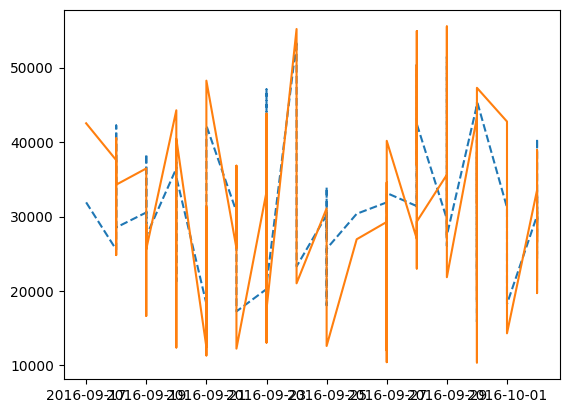

In [40]:
plotModel(LinearRegression())

3100.0

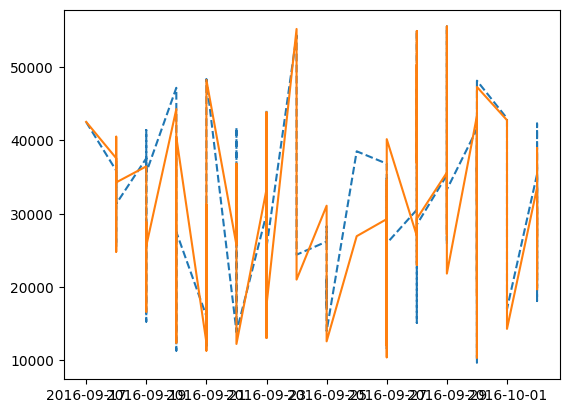

In [41]:
plotModel(DecisionTreeRegressor())

2728.86328125

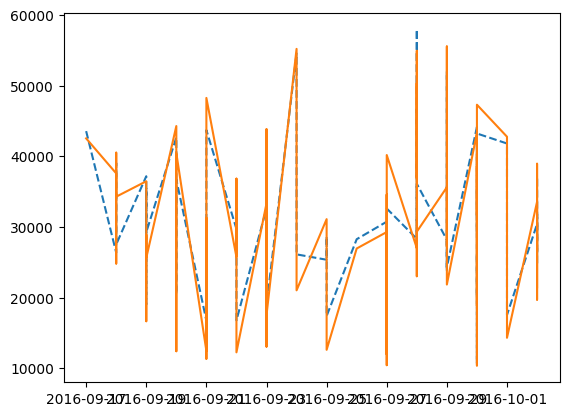

In [42]:
best_model = XGBRegressor(random_state=0)
best_model.fit(X_train, y_train)
plotModel(best_model)

In [45]:
from time import time
time1 = time()
newModel = XGBRegressor(random_state=0)
newModel.fit(X_train, y_train)
newModel.score(X_test, y_test)
time2 = time()
time2 - time1


19.16382122039795

19.73830223083496

## Hyper parameter Tuning

In [44]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# ensemble:
# - boosting: XGBost, GradientBoost, AdaBoost
# - bagging: Random Forest

### Hyper parameter tuning 1st iteration

In [ ]:
params={'max_depth': [32, 64, 128, None],
 'max_features': [None],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [3, 6],
 'n_estimators': [32, 64, 128]}

model = RandomForestRegressor(random_state=1)
grid_search=RandomizedSearchCV(model,params,cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)


[17:15:22] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



KeyboardInterrupt: ignored

In [ ]:
## Overfitting

In [ ]:
grid_search.best_params_

{'n_estimators': 128,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 32}

In [ ]:
best_model1=grid_search.best_estimator_
predictions1 = best_model1.predict(X_test)
trainModel(best_model1)

(0.7907531600327576, 3669.881962236253)

plotModel(best_model1)

### Hyper parameter tuning 2nd iteration

In [ ]:
params={'max_depth': [114, 128, 142],
 'max_features': [None],
 'min_samples_leaf': [2, 3],
 'min_samples_split': [5, 6, 7],
 'n_estimators': [70, 90, 100, 110, 120]}

model = RandomForestRegressor(random_state=1)
grid_search=RandomizedSearchCV(model,params,cv=5,scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1),
                   param_distributions={'max_depth': [114, 128, 142],
                                        'max_features': [None],
                                        'min_samples_leaf': [2, 3],
                                        'min_samples_split': [5, 6, 7],
                                        'n_estimators': [70, 90, 100, 110,
                                                         120]},
                   scoring='neg_mean_absolute_error')

In [ ]:
grid_search.best_params_

{'n_estimators': 120,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 114}

In [ ]:
best_model2=grid_search.best_estimator_
predictions2 = best_model2.predict(X_test)
trainModel(best_model2)

(0.9280845335089554, 1840.9738022706745)

1193.1269411375652

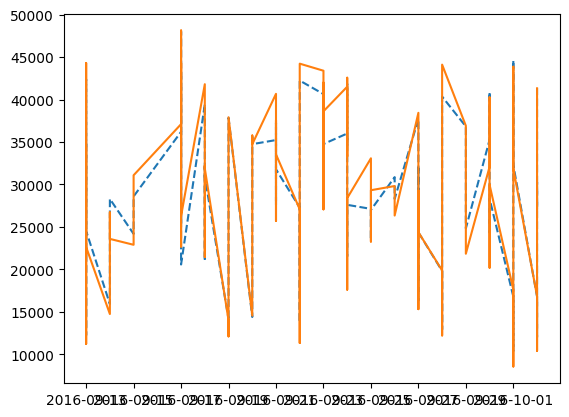

In [ ]:
plotModel(best_model2)

## Hyper parameter Tuning on XGBoost

In [46]:
params={'n_estimators':[100,200,500],'max_depth':[2,5,10],'learning_rate':[0.01,0.1,0.5]}

model = XGBRegressor(objective="reg:squarederror")
grid_search=RandomizedSearchCV(model,params,cv=5)
grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5],
                                        'max_depth': [2, 5, 10],
                                        'n_estimators': [100, 200, 500]})

In [47]:
grid_search.best_params_

{'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1}

In [48]:
best_model3=grid_search.best_estimator_
predictions3 = best_model3.predict(X_test)
trainModel(best_model3)

(0.8427345294192201, 3136.5736442979774)

In [49]:
mean_absolute_error(y_test.values, predictions3)

3136.5736442979774

2312.53125

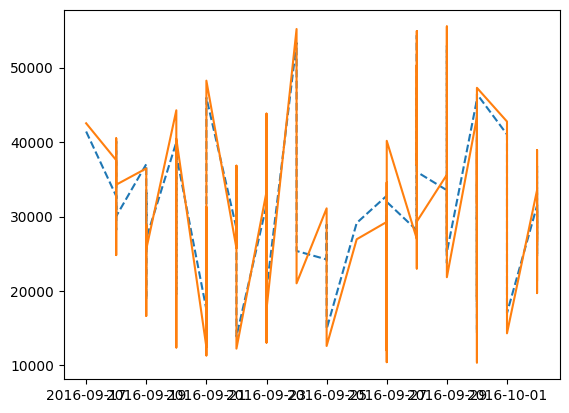

In [50]:
plotModel(best_model3)

## Feature Engineering / Feature Selection

1. Create new features from the ones that we have
2. Select relevant features based on some numerical/statistical decision. .e.g feature importance from Random Forest, SHAP

In [52]:
for ii,col in enumerate(X_train.columns):
  print(col,best_model3.feature_importances_[ii])

index 0.0006605398
div_rank 0.003914676
gb 0.0009905953
streak 0.00037819677
double_header 0.000824106
runs_pg 0.0010436283
runs_ma 0.00052989693
runs_allowed_ma 0.0005483848
ten_game 0.00059686747
opening_day 0.03050688
total_games 0.0026399384
win_pct 0.007202939
night_game 0.001528606
year 0.0061629117
month 0.0026201948
day 0.00068523875
weekday 0.008564236
capacity 0.019212365
division_game 0.0011186588
new_series 0.0006569813
team_x_ARI 0.0029619897
team_x_ATL 0.0027753531
team_x_BAL 0.006800448
team_x_BOS 0.05583779
team_x_CHC 0.043749377
team_x_CHW 0.009851076
team_x_CIN 0.0063670566
team_x_CLE 0.014709463
team_x_COL 0.005178658
team_x_DET 0.002974895
team_x_FLA 0.022452617
team_x_HOU 0.0069147763
team_x_KCR 0.00815652
team_x_LAA 0.052039877
team_x_LAD 0.02735677
team_x_MIA 0.0010043549
team_x_MIL 0.0042110365
team_x_MIN 0.022267513
team_x_MON 0.07956443
team_x_NYM 0.0037648526
team_x_NYY 0.04119066
team_x_OAK 0.014266171
team_x_PHI 0.056151617
team_x_PIT 0.0020049359
team_x_SD

In [53]:
important_features=X_train.columns[best_model3.feature_importances_.argsort()[::-1]][:40]
important_features

Index(['team_x_MON', 'team_x_STL', 'team_x_TBD', 'team_x_PHI', 'team_x_BOS',
       'team_x_LAA', 'team_x_SFG', 'team_x_CHC', 'team_x_NYY', 'opening_day',
       'stadium_Tropicana', 'team_x_LAD', 'team_x_FLA', 'team_x_MIN',
       'capacity', 'team_x_TBR', 'stadium_Metrodome', 'team_x_CLE',
       'team_x_OAK', 'opponent_NYY', 'stadium_Yankee Stadium I',
       'stadium_Citizens Bank Park', 'team_x_TOR', 'stadium_Busch Stadium',
       'team_x_CHW', 'team_x_SEA', 'weekday', 'team_x_KCR', 'win_pct',
       'opponent_BOS', 'team_x_HOU', 'team_x_BAL', 'team_x_CIN',
       'opponent_CHC', 'year', 'stadium_Angel Stadium', 'team_x_COL',
       'opponent_SFG', 'team_x_WSN', 'stadium_Target Field'],
      dtype='object')

In [54]:
X_train_red=X_train.loc[:,important_features]
X_test_red=X_test.loc[:,important_features]

In [55]:
X_train.shape,X_train_red.shape

((28776, 133), (28776, 40))

In [56]:
X_train.columns

Index(['index', 'div_rank', 'gb', 'streak', 'double_header', 'runs_pg',
       'runs_ma', 'runs_allowed_ma', 'ten_game', 'opening_day',
       ...
       'stadium_Sun Life Stadium', 'stadium_Target Field',
       'stadium_Three Rivers Stadium', 'stadium_Tropicana',
       'stadium_Turner Field', 'stadium_US Cellular Field',
       'stadium_Veterans Stadium', 'stadium_Wrigley Field',
       'stadium_Yankee Stadium I', 'stadium_Yankee Stadium II'],
      dtype='object', length=133)

In [ ]:
model4 = RandomForestRegressor()
model4.fit(X_train_red, y_train)

RandomForestRegressor()

In [57]:
model4 = grid_search.best_estimator_
model4.fit(X_train_red, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [58]:
predictions4 = model4.predict(X_test_red)
mean_absolute_error(y_test.values, predictions4)

3727.238693317725

2802.20703125


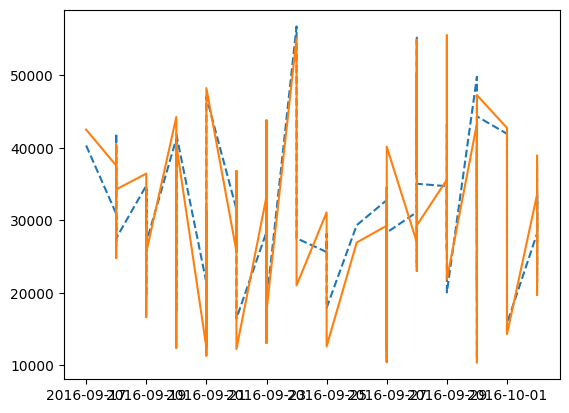

In [62]:
model4.fit(X_train_red, y_train)
predictions = model4.predict(X_test_red)
#plt.plot(df_OAK['date'][-162:], predictions, "--") #predicted
#plt.plot(df_OAK['date'][-162:], y_test) #actual
print(np.abs(predictions-y_test).median())
plt.plot(df_test['date'][-81:], predictions[-81:], "--") #predicted
plt.plot(df_test['date'][-81:], y_test[-81:]) #actual
